In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
watch_time = pd.read_csv("../data/watch_time_by_trial_day.csv", index_col=0)

In [3]:
watch_time.head()

,user_uid,day_1_total_watchtime,day_1_watched_video_length,day_2_total_watchtime,day_2_watched_video_length,day_3_total_watchtime,day_3_watched_video_length,day_-3_total_watchtime,day_-3_watched_video_length,day_-2_total_watchtime,day_-2_watched_video_length,day_-1_total_watchtime,day_-1_watched_video_length
0,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,526,NaN,NaN,1177.0,1899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1419,3949.0,6445.0,1193.0,3055.0,125.0,1480.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3113,303.0,558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4377,1375.0,1701.0,NaN,NaN,NaN,NaN,NaN,NaN,1220.0,1274.0,NaN,NaN


In [4]:
combined = pd.read_csv("../data/skillshare_2022_starts_views_combined.csv", index_col=0)
combined.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31
0,23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
watch_time = pd.merge(watch_time, combined[["user_uid", "success"]], on="user_uid")

In [6]:
watch_time

,user_uid,day_1_total_watchtime,day_1_watched_video_length,day_2_total_watchtime,day_2_watched_video_length,day_3_total_watchtime,day_3_watched_video_length,day_-3_total_watchtime,day_-3_watched_video_length,day_-2_total_watchtime,day_-2_watched_video_length,day_-1_total_watchtime,day_-1_watched_video_length,success
0,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,526,NaN,NaN,1177.0,1899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1419,3949.0,6445.0,1193.0,3055.0,125.0,1480.0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3113,303.0,558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4377,1375.0,1701.0,NaN,NaN,NaN,NaN,NaN,NaN,1220.0,1274.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236224,26284119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
236225,26284144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
236226,26284161,2.0,342.0,14.0,342.0,3.0,342.0,NaN,NaN,NaN,NaN,NaN,NaN,0
236227,26284162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
watch_time[["day_1_total_watchtime", "day_-1_total_watchtime"]].dropna(how="all")

,day_1_total_watchtime,day_-1_total_watchtime
2,3949.0,NaN
3,303.0,NaN
4,1375.0,NaN
8,913.0,NaN
16,15.0,60.0
...,...,...
236212,1589.0,NaN
236213,1618.0,NaN
236217,296.0,NaN
236218,1709.0,NaN


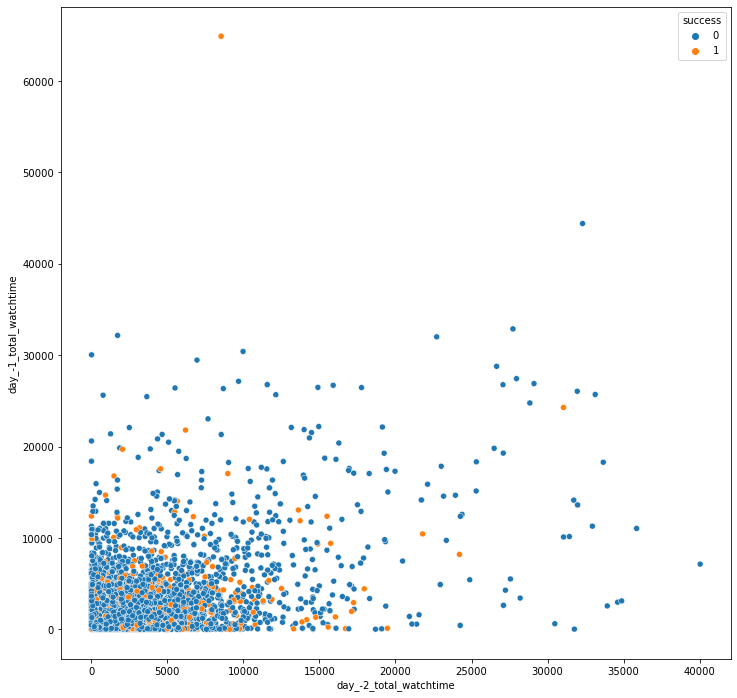

In [12]:
plt.figure(figsize=(12,12))
sns.scatterplot(
        data=watch_time,
        x="day_-2_total_watchtime",
        y="day_-1_total_watchtime",
        hue="success")
plt.show()

In [16]:
watch_time["mean_first_3_days"] = watch_time[["day_1_total_watchtime", "day_2_total_watchtime", "day_3_total_watchtime"]].mean(axis=1)
watch_time["mean_last_3_days"] = watch_time[["day_-1_total_watchtime", "day_-2_total_watchtime", "day_-3_total_watchtime"]].mean(axis=1)
watch_time.head()

,user_uid,day_1_total_watchtime,day_1_watched_video_length,day_2_total_watchtime,day_2_watched_video_length,day_3_total_watchtime,day_3_watched_video_length,day_-3_total_watchtime,day_-3_watched_video_length,day_-2_total_watchtime,day_-2_watched_video_length,day_-1_total_watchtime,day_-1_watched_video_length,success,mean_first_3_days,mean_last_3_days
0,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1,526,NaN,NaN,1177.0,1899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1177.000000,NaN
2,1419,3949.0,6445.0,1193.0,3055.0,125.0,1480.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1755.666667,NaN
3,3113,303.0,558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,303.000000,NaN
4,4377,1375.0,1701.0,NaN,NaN,NaN,NaN,NaN,NaN,1220.0,1274.0,NaN,NaN,0,1375.000000,1220.0


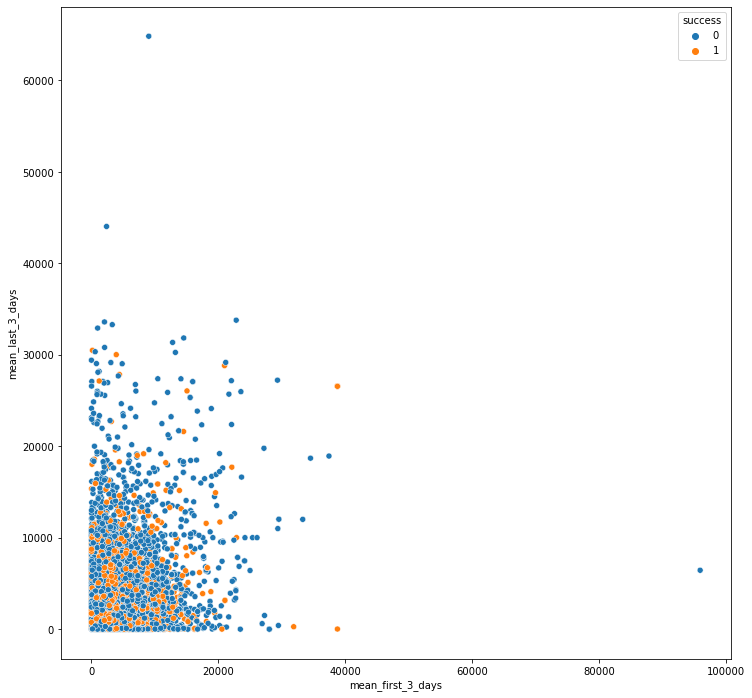

In [17]:
plt.figure(figsize=(12,12))
sns.scatterplot(
        data=watch_time,
        x="mean_first_3_days",
        y="mean_last_3_days",
        hue="success")
plt.show()